In [ ]:
import os
import json
import re

# 데이터셋 경로 (training + validation)
data_dirs = [
    "/data/seungmin/dataset/kr_univ_lec/training/labels/eng/arch",
    "/data/seungmin/dataset/kr_univ_lec/validation/labels/eng/arch"
]

# 숫자 또는 영어 포함 여부를 확인하는 함수
def has_number_and_english(text):
    has_number = bool(re.search(r'\d', text))  # 숫자가 있는지 확인
    has_english = bool(re.search(r'[A-Za-z]', text))  # 영어가 있는지 확인
    return has_number and has_english  # 둘 다 있어야 True

# 필터링된 파일 개수
total_json_files = 0
files_with_numbers_and_english = 0
files_without_numbers_and_english = 0

for data_dir in data_dirs:
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.json'):
                total_json_files += 1
                file_path = os.path.join(root, file)

                # JSON 파일 열기
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)

                # 발화 텍스트 추출
                text = data.get("06_transcription", {}).get("1_text", "").strip()

                # 숫자와 영어 포함 여부 확인
                if has_number_and_english(text):
                    files_with_numbers_and_english += 1
                else:
                    files_without_numbers_and_english += 1

# 결과 출력
print("총 JSON 파일 개수:", total_json_files)
print("숫자와 영어가 모두 포함된 파일 개수:", files_with_numbers_and_english)
print("숫자와 영어가 없는 파일 개수:", files_without_numbers_and_english)


📌 총 JSON 파일 개수: 130025
✅ 숫자와 영어가 모두 포함된 파일 개수: 7756
❌ 숫자와 영어가 없는 파일 개수: 122269


📌 숫자와 영어가 포함된 파일 개수: 7756
count    7756.000000
mean       13.635306
std         8.811756
min         1.644625
50%        11.398719
95%        31.112063
99%        45.150309
max        62.002437
Name: speech_length, dtype: float64


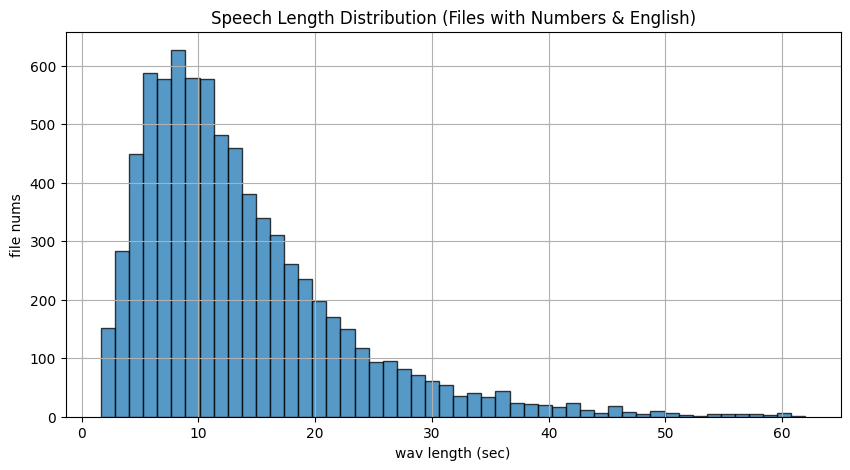

In [ ]:
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 경로
data_dirs = [
    "/data/seungmin/dataset/kr_univ_lec/training/labels/eng/arch",
    "/data/seungmin/dataset/kr_univ_lec/validation/labels/eng/arch"
]

# 숫자와 영어 포함 여부를 확인하는 함수
def has_number_and_english(text):
    has_number = bool(re.search(r'\d', text))  # 숫자가 있는지 확인
    has_english = bool(re.search(r'[A-Za-z]', text))  # 영어가 있는지 확인
    return has_number and has_english  # 둘 다 있어야 True

# 음성 길이 데이터 수집
speech_lengths = []

for data_dir in data_dirs:
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(root, file)

                try:
                    # JSON 파일 열기
                    with open(file_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)

                    # 발화 텍스트 추출
                    text = data.get("06_transcription", {}).get("1_text", "").strip()

                    # 숫자와 영어 포함 여부 확인
                    if has_number_and_english(text):
                        # 음성 길이 추출
                        speech_length = float(data.get("01_dataset", {}).get("9_speech_length", 0))
                        speech_lengths.append(speech_length)

                except (json.JSONDecodeError, ValueError):
                    print(f"JSONDecodeError: {file_path} (파일이 손상됨)")
                except Exception as e:
                    print(f"기타 오류 발생: {file_path} (오류: {e})")

# Pandas 데이터프레임 생성
df = pd.DataFrame({"speech_length": speech_lengths})

# 기본 통계 출력
print("숫자와 영어가 포함된 파일 개수:", len(df))
print(df["speech_length"].describe(percentiles=[0.95, 0.99]))

# 히스토그램 시각화
plt.figure(figsize=(10, 5))
plt.hist(df["speech_length"], bins=50, alpha=0.75, edgecolor="black")
plt.xlabel("wav length (sec)")
plt.ylabel("file nums")
plt.title("Speech Length Distribution (Files with Numbers & English)")
plt.grid(True)
plt.show()


In [ ]:
import os
import re
import json

# 데이터셋 디렉토리 지정
data_dirs = [
    "/data/seungmin/dataset/kr_univ_lec/training/labels/eng/arch",
    "/data/seungmin/dataset/kr_univ_lec/validation/labels/eng/arch"
]

# 말더듬음 제거 함수
def remove_stutters(text):
    return re.sub(r"\b[a-zA-Z]+/", "", text)

''''''
# 숫자 또는 영어가 포함되었는지 확인하는 함수
def has_number_or_english(text):
    return bool(re.search(r'[A-Za-z0-9]', text))

# 숫자와 영어가 모두 포함되었는지 확인하는 함수
def has_both_number_and_english(text):
    has_number = bool(re.search(r'[0-9]', text))
    has_english = bool(re.search(r'[A-Za-z]', text))
    return has_number and has_english  # 둘 다 포함될 때만 True

''''''
# 필터링된 파일 카운트
filtered_files = []
total_json_files = 0
files_with_numbers_or_english = 0
files_without_numbers_or_english = 0

for data_dir in data_dirs:
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.json'):
                total_json_files += 1
                file_path = os.path.join(root, file)

                # JSON 파일 열기
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)

                # 발화 텍스트 추출
                text = data.get("06_transcription", {}).get("1_text", "").strip()

                # 숫자와 영어 포함 여부 확인
                if has_number_or_english(text):
                    files_with_numbers_or_english += 1
                else:
                    files_without_numbers_or_english += 1

# 결과 출력
print("총 JSON 파일 개수:", total_json_files)
print("내가 쓸 거 -----------------숫자 or 영어가 포함된 파일 개수:", files_with_numbers_or_english)
print("숫자 or 영어가 없는 파일 개수:", files_without_numbers_or_english)


📌 총 JSON 파일 개수: 130025
✅ 숫자 or 영어가 모두 포함된 파일 개수: 40384
❌ 숫자 or 영어가 없는 파일 개수: 89641
